In [1]:
import pandas as pd

In [2]:
s=pd.read_csv('country_wise_CORONA.csv')

In [3]:
import os 
os.getcwd()

'c:\\Users\\user\\Desktop'

In [4]:
s

,Country/Region,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,WHO Region,New cases
0,Afghanistan,36263,1269,25198,9796,3.50,69.49,5.04,35526,Eastern Mediterranean,106
1,Albania,4880,144,2745,1991,2.95,56.25,5.25,4171,Europe,117
2,Algeria,27973,1163,18837,7973,4.16,67.34,6.17,23691,Africa,616
3,Andorra,907,52,803,52,5.73,88.53,6.48,884,Europe,10
4,Angola,950,41,242,667,4.32,25.47,16.94,749,Africa,18
...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,0.73,35.33,2.08,8916,Eastern Mediterranean,152
183,Western Sahara,10,1,8,1,10.00,80.00,12.50,10,Africa,0
184,Yemen,1691,483,833,375,28.56,49.26,57.98,1619,Eastern Mediterranean,10
185,Zambia,4552,140,2815,1597,3.08,61.84,4.97,3326,Africa,71


In [5]:
s.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
WHO Region                0
New cases                 0
dtype: int64

In [6]:
s.shape

(187, 11)

In [7]:
# Now to dummied the columns
x=s.pop('WHO Region') 
y=s.pop('Country/Region')


In [8]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Confirmed               187 non-null    int64  
 1   Deaths                  187 non-null    int64  
 2   Recovered               187 non-null    int64  
 3   Active                  187 non-null    int64  
 4   Deaths / 100 Cases      187 non-null    float64
 5   Recovered / 100 Cases   187 non-null    float64
 6   Deaths / 100 Recovered  187 non-null    float64
 7   Confirmed last week     187 non-null    int64  
 8   New cases               187 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 13.3 KB


## Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=s.iloc[:]

In [11]:
X.drop('New cases',inplace=True,axis=1)

In [12]:
X

,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week
0,36263,1269,25198,9796,3.50,69.49,5.04,35526
1,4880,144,2745,1991,2.95,56.25,5.25,4171
2,27973,1163,18837,7973,4.16,67.34,6.17,23691
3,907,52,803,52,5.73,88.53,6.48,884
4,950,41,242,667,4.32,25.47,16.94,749
...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,0.73,35.33,2.08,8916
183,10,1,8,1,10.00,80.00,12.50,10
184,1691,483,833,375,28.56,49.26,57.98,1619
185,4552,140,2815,1597,3.08,61.84,4.97,3326


In [13]:
y=s['New cases']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [15]:
X_train.shape

(130, 8)

In [16]:
y_test.shape

(57,)

In [21]:
from sklearn.preprocessing import StandardScaler

In [28]:
# scale=StandardScaler()
# X_train=scale.fit_transform(X_train)
# X_test=scale.fit_transform(X_test)
# y_test=scale.fit_transform(y_test)
# y_train=scale.fit_transform(y_train)


In [17]:
from sklearn.linear_model import LinearRegression 

In [18]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_p=model.predict(X_test)
y_p=np.where(y_p<0,0,y_p)

In [62]:
model.coef_

array([ 1.48854007e-01,  9.73818396e-02,  1.78742970e-02,  3.35978706e-02,
        2.56909898e+01,  3.28515963e+00, -1.09184100e-01, -1.86400703e-01])

In [63]:
model.intercept_

58.89209812986951

In [23]:
from sklearn.metrics import *

In [39]:
mean_absolute_error(y_test,y_test)

0.0

In [64]:
mean_absolute_error(y_test,y_p)

529.5346775804223

In [65]:
(mean_absolute_error(y_test,y_p))**.5

23.0116204901007

In [66]:
r2_score(y_test,y_p)

0.33792036000634407

In [58]:
model.score(X_train,y_train)

0.951110457770822

In [28]:
import matplotlib.pyplot as  plt

Text(0, 0.5, 'model predict')

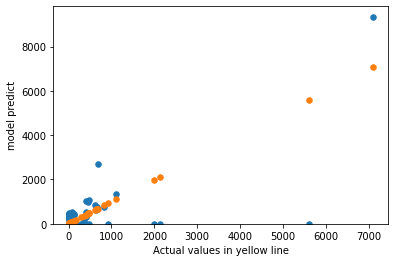

In [53]:
plt.scatter(y_test,y_p,s=30)
plt.scatter(y_test,y_test,s=30)
plt.ylim(0,)

plt.xlabel('Actual values in yellow line')
plt.ylabel('model predict')

(array([50.,  3.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([   0. ,  709.6, 1419.2, 2128.8, 2838.4, 3548. , 4257.6, 4967.2,
        5676.8, 6386.4, 7096. ]),
 <BarContainer object of 10 artists>)

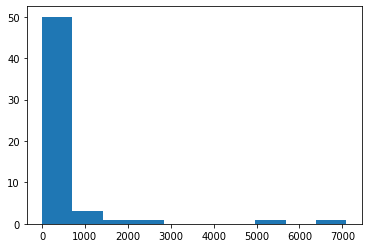

In [55]:
plt.hist(y_test)

### the value is more between 0 to 1000

In [ ]:
import seaborn as sns

(0.0, 10126.175824547769)

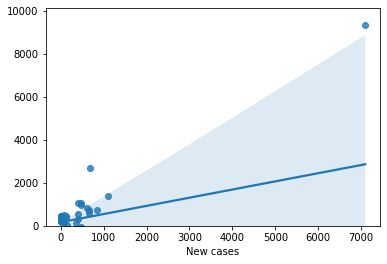

In [43]:
sns.regplot(x=y_test,y=y_p)
plt.ylim(0,)